# Logistic Regression Test

In [1]:
# import packages
import numpy
import pandas
import scipy
import sklearn
import matplotlib
import itertools

In [2]:
# import wine data set, classification algorithm
from sklearn import preprocessing
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from __future__ import division
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [3]:
# load and assign wine data set 
wine = datasets.load_wine()

In [4]:
# assign features and labels
features = wine.data
labels = wine.target

In [5]:
# print feature names and count
print(wine.feature_names)
print(len(wine.feature_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
13


In [6]:
# print target names and count
print(wine.target_names)
print(len(wine.target_names))

['class_0' 'class_1' 'class_2']
3


In [5]:
# display structure of data set
wine_pd = pandas.DataFrame(data=wine['data'],columns=wine['feature_names'])
data = wine_pd
data['target']=wine['target']
# next line could be used to map target value to target name from original data set
# in this case 0 mapped to class_0 seems redundant
# data['class']=data['target'].map(lambda ind: wine['target_names'][ind])
data.head()
# print(data)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
# display count of rows and columns in data frame
def num_rows(data):
    return len(data)

print("Number of rows in data frame: %d" %num_rows(data))
print("Number of columns in data frame: %d" %len(data.columns))

Number of rows in data frame: 178
Number of columns in data frame: 14


In [6]:
# partition data set for training and testing (70/30)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 123, stratify = labels)

In [10]:
# logistic regression
classifier = linear_model.LogisticRegression()
# train logistic model
classifier.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# make predictions
predictions = classifier.predict(test_features)
print predictions

[0 0 0 1 0 0 0 1 2 1 1 1 2 1 2 2 2 1 1 2 1 0 1 2 0 2 1 1 0 2 1 1 2 0 0 0 0
 1 2 1 0 2 1 2 0 1 1 1 0 2 0 1 1 2]


In [12]:
# cross-validate
score = 0
for i in range(len(predictions)):
    if predictions[i] == test_labels[i]:
        score += 1
print score/len(predictions)

# much better than both radial SVM (30%-40%) and random chance (33%),
# about the same as decision tree and random forest and linear svm

0.981481481481


In [14]:
# evaluate model performance
classifier.score(test_features, test_labels)

0.9814814814814815

In [55]:
# With all 13 features
# The coefficients
print("feature: class_0 coefficient, class_1 coefficient, class_2 coefficient")
print("-----------------------------------------------------------------------")
print("intercept: %.4f, %.4f, %.4f" % (classifier.intercept_[0], classifier.intercept_[1], classifier.intercept_[2]))
for i in range(len(wine.feature_names)):
    print("%s: %.4f, %.4f, %.4f" % (wine.feature_names[i], classifier.coef_[0][i], classifier.coef_[1][i], classifier.coef_[2][i]))
# The accuracy score: 1 is perfect prediction
print("")
print("Accuracy Score: %.2f \n" % accuracy_score(test_labels, predictions))
# Confusion matrix 
print('Confusion Matrix:')
print(confusion_matrix(test_labels, predictions))

feature: class_0 coefficient, class_1 coefficient, class_2 coefficient
-----------------------------------------------------------------------
intercept: -0.1819, 0.2849, -0.0723
alcohol: -0.2105, 0.7217, -0.4407
malic_acid: 0.9174, -0.9869, 0.4763
ash: 0.6952, -0.5752, 0.0732
alcalinity_of_ash: -0.8054, 0.3064, 0.1330
magnesium: -0.0417, 0.0065, 0.0348
total_phenols: 0.2734, 0.1114, -0.6449
flavanoids: 1.1836, 0.5622, -1.8754
nonflavanoid_phenols: 0.0076, 0.4086, -0.0675
proanthocyanins: -0.1506, 0.5598, -0.6622
color_intensity: -0.1336, -1.8249, 0.9837
hue: -0.0926, 0.7397, -0.5171
od280/od315_of_diluted_wines: 0.8361, 0.1556, -1.0591
proline: 0.0170, -0.0121, 0.0003

Accuracy Score: 0.98 

Confusion Matrix:
[[17  1  0]
 [ 0 21  0]
 [ 0  0 15]]


Confusion matrix, without normalization
[[17  1  0]
 [ 0 21  0]
 [ 0  0 15]]
Normalized confusion matrix
[[0.94444444 0.05555556 0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]


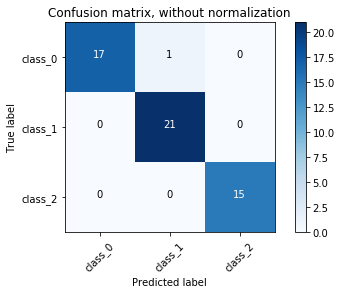

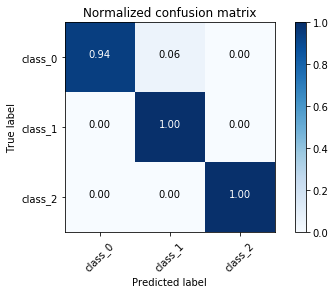

In [56]:
# explore confusion matrix further and visualize
class_names = wine.target_names
# This function prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True`
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=pyplot.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = numpy.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')


cnf_matrix = confusion_matrix(test_labels, predictions)
# Plot non-normalized confusion matrix
pyplot.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
pyplot.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

pyplot.show()

Logistic Regression using first two principal components

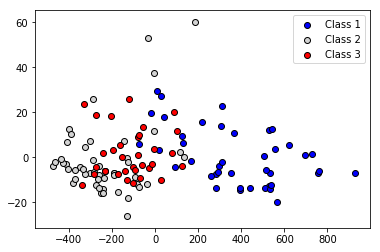

In [53]:
# pca and visualize along two principal components
pca = PCA(n_components = 2)
transformed_pd = pandas.DataFrame(pca.fit_transform(train_features))
transformed = pca.fit_transform(train_features)
# logistic regression
classifier1 = linear_model.LogisticRegression()
# fit logistic regression using first 2 principal components
classifier1.fit(transformed, train_labels)

pyplot.scatter(transformed_pd[train_labels==0][0], transformed_pd[train_labels==0][1], label='Class 1', c='blue', edgecolors = 'k')
pyplot.scatter(transformed_pd[train_labels==1][0], transformed_pd[train_labels==1][1], label='Class 2', c='lightgrey', edgecolors = 'k')
pyplot.scatter(transformed_pd[train_labels==2][0], transformed_pd[train_labels==2][1], label='Class 3', c='red', edgecolors = 'k')

pyplot.legend()
pyplot.show()

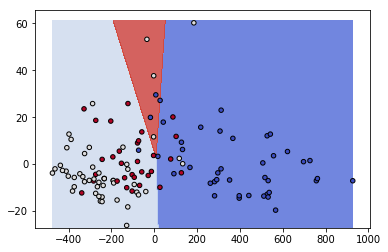

In [54]:
# Plot output along first two principal components
# decision boundary from logistic regression using principal components as measure along axes
h = 0.2
x_min, x_max = transformed[:,0].min() - 1, transformed[:, 0].max() + 1
y_min, y_max = transformed[:,1].min() - 1, transformed[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))
Z = classifier1.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pyplot.contourf(xx, yy, Z, cmap = pyplot.cm.coolwarm, alpha = 0.8)
pyplot.scatter(transformed[:,0], transformed[:,1], c = train_labels, cmap = pyplot.cm.coolwarm, s=20, edgecolors='k')
pyplot.show()

In [55]:
# check performance of logistic regression after PCA
transformed_test = pca.fit_transform(test_features)
# make predictions
predictions1 = classifier1.predict(transformed_test)
print predictions1
# cross-validate
score = 0
for i in range(len(predictions)):
    if predictions1[i] == test_labels[i]:
        score += 1
print score/len(predictions1)

# PCA reduces accuracy of the logistic regression by ~30%

[0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1]
0.703703703704


In [58]:
# evaluate model performance
transformed2 = pca.fit_transform(test_features)
classifier1.score(transformed2, test_labels)

0.7037037037037037

In [61]:
# With only first two principal components
# The coefficients
print("feature: class_0 coefficient, class_1 coefficient, class_2 coefficient")
print("-----------------------------------------------------------------------")
print("intercept: %.4f, %.4f, %.4f" % (classifier1.intercept_[0], classifier1.intercept_[1], classifier1.intercept_[2]))
for i in range(2):
    print("Principal Component %d: %.4f, %.4f, %.4f" % (i + 1, classifier1.coef_[0][i], classifier1.coef_[1][i], classifier1.coef_[2][i]))
# The mean squared error
print("")
print("Accuracy Score: %.2f \n" % accuracy_score(test_labels, predictions1))
# Explained variance score: 1 is perfect prediction
print('Confusion Matrix:')
print(confusion_matrix(test_labels, predictions1))

feature: class_0 coefficient, class_1 coefficient, class_2 coefficient
-----------------------------------------------------------------------
intercept: -1.1521, -0.9524, -1.0538
Principal Component 1: 0.0144, -0.0072, -0.0018
Principal Component 2: 0.0012, -0.0056, 0.0131

Accuracy Score: 0.70 

Confusion Matrix:
[[18  0  0]
 [ 1 20  0]
 [ 2 13  0]]


Confusion matrix, without normalization
[[18  0  0]
 [ 1 20  0]
 [ 2 13  0]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.04761905 0.95238095 0.        ]
 [0.13333333 0.86666667 0.        ]]


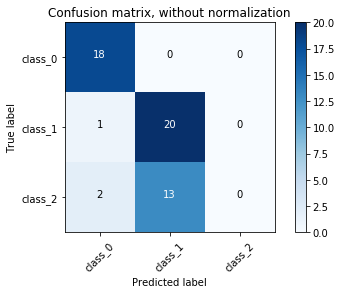

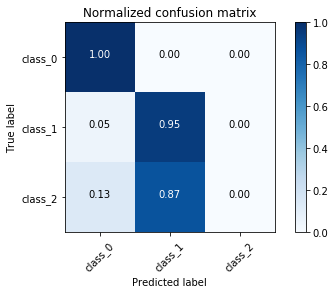

In [62]:
cnf_matrix1 = confusion_matrix(test_labels, predictions1)
# Plot non-normalized confusion matrix
pyplot.figure()
plot_confusion_matrix(cnf_matrix1, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
pyplot.figure()
plot_confusion_matrix(cnf_matrix1, classes=class_names, normalize=True, title='Normalized confusion matrix')

pyplot.show()

Try logistic regression with scaled data in pipeline

In [63]:
# standardization that can be reproduced on training and testing sets by saving means 
# and standard deviations from training set standardization
scaler = preprocessing.StandardScaler().fit(train_features)
# confirm standardization
train_features_scaled = scaler.transform(train_features)
print(train_features_scaled.mean(axis = 0))
print(train_features_scaled.std(axis = 0))

[ 7.70217223e-15 -1.43523186e-15 -2.55575131e-15  1.57400974e-15
  3.43811001e-16 -1.07082801e-15 -5.81971747e-17 -6.19576075e-16
  8.29869327e-16  1.37613935e-15 -6.48842539e-16 -2.01451759e-16
 -1.47731290e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [64]:
# apply transformer to testing set
test_features_scaled = scaler.transform(test_features)
# confirm standardization
print(test_features_scaled.mean(axis = 0))
print(test_features_scaled.std(axis = 0))

[-0.00921788 -0.04787367  0.37291796  0.22584572  0.29995006  0.25528222
  0.11495994 -0.06754168  0.141273   -0.02865806  0.1007572   0.03183192
 -0.06559651]
[1.08602394 1.05404087 1.1291255  1.04353505 0.83371536 0.94845563
 0.95534196 1.05282609 1.09311142 1.11238174 1.05829275 0.99497694
 0.9069575 ]


In [65]:
# pipeline with preprocessing and model
pipeline = make_pipeline(preprocessing.StandardScaler(), linear_model.LogisticRegression())

In [66]:
# print tunable hyperparameters
print(pipeline.get_params())

{'logisticregression__n_jobs': 1, 'logisticregression__multi_class': 'ovr', 'standardscaler__with_mean': True, 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'logisticregression__penalty': 'l2', 'standardscaler__copy': True, 'logisticregression__C': 1.0, 'logisticregression__random_state': None, 'logisticregression__max_iter': 100, 'logisticregression__dual': False, 'logisticregression__warm_start': False, 'logisticregression__verbose': 0, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='li

In [67]:
# declare desired hyperparameters
hyperparameters = {"logisticregression__max_iter" : [50, 100, 200],
                  "logisticregression__class_weight": [None, "balanced"],
                  "logisticregression__fit_intercept" : [True, False]}

In [68]:
# tune model using cross-validation pipeline
classifier2 = GridSearchCV(pipeline, hyperparameters, cv = 10)
# fit and tune model
classifier2.fit(train_features_scaled, train_labels)
# print best set of parameters
print(classifier2.best_params_)

{'logisticregression__max_iter': 50, 'logisticregression__class_weight': None, 'logisticregression__fit_intercept': True}


In [69]:
# refit on entire training set
print(classifier2.refit)

True


In [70]:
# evaluate model pipeline on test data
# predict using test set
predictions2 = classifier2.predict(test_features)

In [1]:
# evaluate model performance
classifier2.score(test_features, test_labels)

In [72]:
# save model for future use
joblib.dump(classifier2, "logistic_regression.pkl")

['logistic_regression.pkl']

In [73]:
# to load model again
classifier2_2 = joblib.load("logistic_regression.pkl")
# predict using test set with loaded model
predictions2 = classifier2_2.predict(test_features)

In [74]:
# cross-validate
score = 0
for i in range(len(predictions2)):
    if predictions2[i] == test_labels[i]:
        score += 1
print score/len(predictions2)

# same as random chance (33%),
# worse than logistic regression using PCA (~65%)
# much worse than logistic regression without preprocessing (~93%)
# preprocessing seems to be a detriment in this case

0.333333333333


In [75]:
# With standardized data
# The coefficients
print("feature: class_0 coefficient, class_1 coefficient, class_2 coefficient")
print("-----------------------------------------------------------------------")
print("intercept: %.4f, %.4f, %.4f" % (classifier2_2.best_estimator_.steps[-1][1].intercept_[0], classifier2_2.best_estimator_.steps[-1][1].intercept_[1], classifier2_2.best_estimator_.steps[-1][1].intercept_[2]))
for i in range(len(wine.feature_names)):
    print("%s: %.4f, %.4f, %.4f" % (wine.feature_names[i], classifier2_2.best_estimator_.steps[-1][1].coef_[0][i], classifier2_2.best_estimator_.steps[-1][1].coef_[1][i], classifier2_2.best_estimator_.steps[-1][1].coef_[2][i]))
# The accuracy score
print("")
print("Accuracy Score: %.2f \n" % accuracy_score(test_labels, predictions2))
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(test_labels, predictions2))

feature: class_0 coefficient, class_1 coefficient, class_2 coefficient
-----------------------------------------------------------------------
intercept: -1.3399, -1.0050, -2.0073
alcohol: 1.4015, -1.3091, 0.1914
malic_acid: 0.3567, -0.3753, 0.2724
ash: 0.8706, -1.1581, 0.5045
alcalinity_of_ash: -1.0403, 0.7381, 0.2487
magnesium: 0.1023, -0.1818, 0.2530
total_phenols: 0.3050, -0.0326, -0.2152
flavanoids: 0.6918, 0.7010, -1.4239
nonflavanoid_phenols: -0.4206, 0.5423, -0.2706
proanthocyanins: -0.0731, 0.1349, -0.3342
color_intensity: 0.0724, -1.6855, 1.3338
hue: 0.0969, 1.1359, -1.0613
od280/od315_of_diluted_wines: 0.9356, -0.0819, -0.7363
proline: 1.6354, -1.4555, -0.0023

Accuracy Score: 0.33 

Confusion Matrix:
[[18  0  0]
 [21  0  0]
 [15  0  0]]


Confusion matrix, without normalization
[[18  0  0]
 [21  0  0]
 [15  0  0]]
Normalized confusion matrix
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


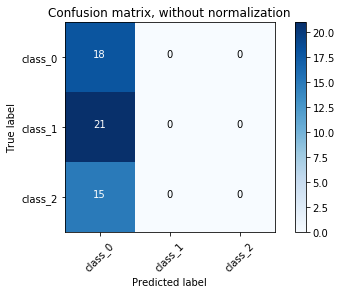

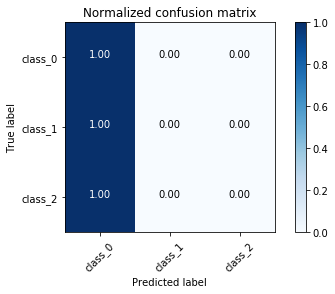

In [76]:
cnf_matrix2 = confusion_matrix(test_labels, predictions2)
# Plot non-normalized confusion matrix
pyplot.figure()
plot_confusion_matrix(cnf_matrix2, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
pyplot.figure()
plot_confusion_matrix(cnf_matrix2, classes=class_names, normalize=True, title='Normalized confusion matrix')

pyplot.show()

In [9]:
from sklearn.multiclass import OneVsRestClassifier
clf5 = OneVsRestClassifier(linear_model.LogisticRegression())
clf5.fit(train_features, train_labels)
clf5.score(train_features, train_labels)

predictions = clf5.predict(test_features)

score = 0
for i in range(len(predictions)):
    if predictions[i] == test_labels[i]:
        score += 1
print score/len(predictions)

0.981481481481


ROC AUC (entire data set for OneVsRestClassifier; LogisticRegression)

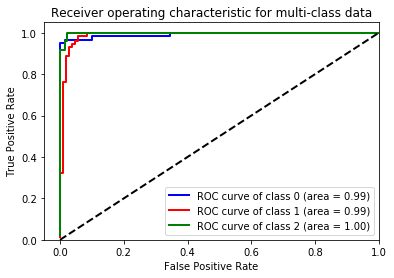

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
import itertools

y_score = cross_val_predict(clf5, features, labels, cv=10 ,method='predict_proba')
y_bin = label_binarize(labels, classes=[0, 1, 2])
n_classes = y_bin.shape[1]
lw = 2

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    pyplot.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
pyplot.plot([0, 1], [0, 1], 'k--', lw=lw)
pyplot.xlim([-0.05, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver operating characteristic for multi-class data')
pyplot.legend(loc="lower right")
pyplot.show()

ROC AUC (training set for OneVsRestClassifier; LogisticRegression)

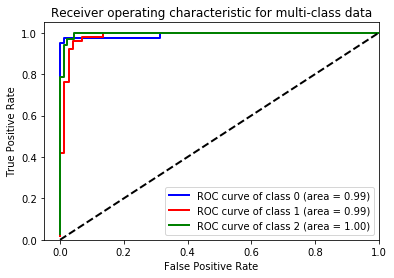

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
import itertools

y_score = cross_val_predict(clf5, train_features, train_labels, cv=10 ,method='predict_proba')
y_bin = label_binarize(train_labels, classes=[0, 1, 2])
n_classes = y_bin.shape[1]
lw = 2

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    pyplot.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
pyplot.plot([0, 1], [0, 1], 'k--', lw=lw)
pyplot.xlim([-0.05, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver operating characteristic for multi-class data')
pyplot.legend(loc="lower right")
pyplot.show()

ROC AUC (testing set for OneVsRestClassifier; LogisticRegression)

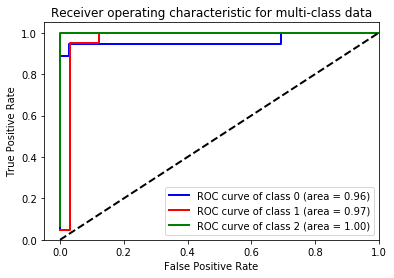

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
import itertools

y_score = cross_val_predict(clf5, test_features, test_labels, cv=10 ,method='predict_proba')
y_bin = label_binarize(test_labels, classes=[0, 1, 2])
n_classes = y_bin.shape[1]
lw = 2

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    pyplot.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
pyplot.plot([0, 1], [0, 1], 'k--', lw=lw)
pyplot.xlim([-0.05, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver operating characteristic for multi-class data')
pyplot.legend(loc="lower right")
pyplot.show()

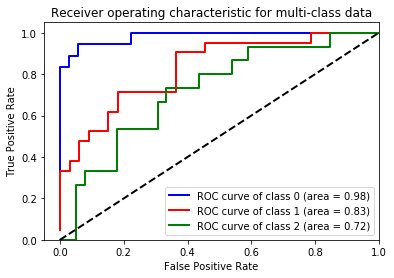

In [62]:

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
import itertools

y_score = cross_val_predict(classifier1, transformed2, test_labels, cv=10 ,method='predict_proba')
y_bin = label_binarize(test_labels, classes=[0, 1, 2])
n_classes = y_bin.shape[1]
lw = 2

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = itertools.cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    pyplot.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
pyplot.plot([0, 1], [0, 1], 'k--', lw=lw)
pyplot.xlim([-0.05, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver operating characteristic for multi-class data')
pyplot.legend(loc="lower right")
pyplot.show()